# Name :- Naman Limani
# NYU Number - N17638906
# Net ID - nl2833
# Email :- nl2833@nyu.edu

In [814]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml

  Cloning https://github.com/pantelis-classes/PRML.git to /private/var/folders/ss/8b3mwz515ys19574271x74km0000gn/T/pip-install-rdo_68vs/prml_16b32130cd30493c9f3b7a4c6a36d504
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /private/var/folders/ss/8b3mwz515ys19574271x74km0000gn/T/pip-install-rdo_68vs/prml_16b32130cd30493c9f3b7a4c6a36d504
  Resolved https://github.com/pantelis-classes/PRML.git to commit 6c7ef85da419a644a4a4feb7ab538d2f4f15d46b
  Preparing metadata (setup.py) ... done


# Optimization algorithms for linear regression

# Task 1 :- Stochastic Gradient Descent

In [817]:
#Importing Libraries 
import torch
import matplotlib.pyplot as plt
import seaborn as sns
#To apply the default theme and style settings to the plots.
sns.set_theme() 

In [818]:
# Define the sinusoidal function using torch
def sinusoidal(x):
    return torch.sin(2 * torch.pi * x)

In [819]:
# Create toy data using PyTorch
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = torch.linspace(domain[0], domain[1], sample_size)
    x = x[torch.randperm(sample_size)]  # Shuffle x using PyTorch
    y = func(x) + torch.normal(mean=torch.zeros_like(x), std=std)
    return x, y

In [820]:
# Data generation
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = torch.linspace(0, 1, 100)
y_test = sinusoidal(x_test)


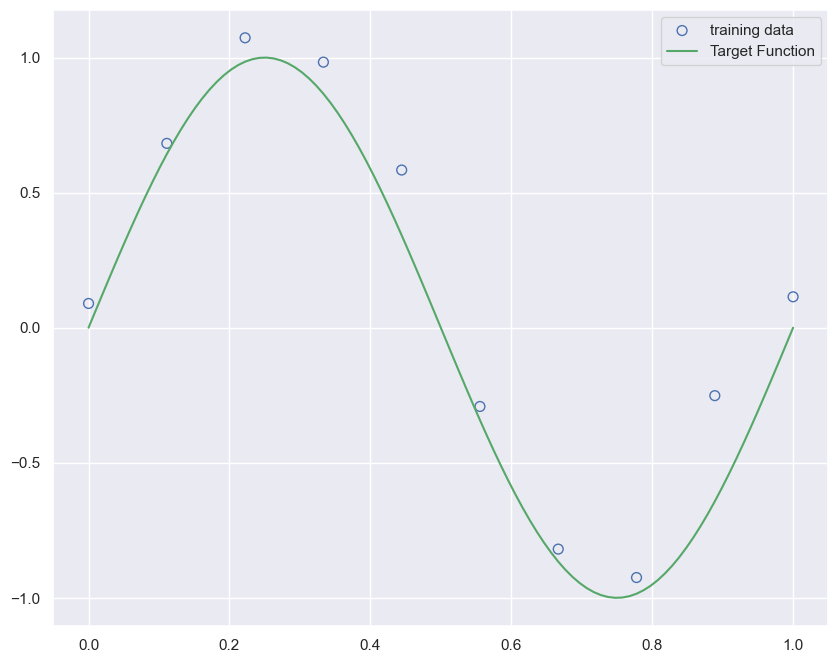

In [821]:
# Plot training data
plt.figure(figsize=[10, 8])
plt.scatter(x_train.numpy(), y_train.numpy(), facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test.numpy(), y_test.numpy(), "-g", label="Target Function")
plt.legend()
plt.show()

In [822]:
# Implement Polynomial features with PyTorch
class PolynomialFeature:
    def __init__(self, degree):
        self.degree = degree
    
    def transform(self, X):
        return torch.cat([X ** i for i in range(self.degree + 1)], dim=1)

In [823]:
# Set degree M=9 as required
M = 9  # Fixed polynomial degree
feature = PolynomialFeature(M)

In [824]:
# Transform training and test data using polynomial features
X_train = feature.transform(x_train.unsqueeze(1))  # Add a dimension to x_train for transformation
X_test = feature.transform(x_test.unsqueeze(1))


In [825]:
# Define the cost function (Mean Squared Error Loss) 
#This function calculates the Mean Squared Error (MSE) loss, which is a common loss function for regression tasks, and adds a regularization term to prevent overfitting.
def cal_cost(theta, X, y, alpha=1e-3):
    m = y.size(0)
    predictions = X.matmul(theta)
    mse_loss = (1 / (2 * m)) * torch.sum((predictions - y) ** 2)
    reg_loss = (alpha / 2) * torch.sum(theta ** 2)  # Regularization term
    cost = mse_loss + reg_loss
    return cost

In [826]:
# Implementing SGD function
def sgd(X, y, theta, learning_rate=0.01, iterations=1000, alpha=1e-3):
    m = y.size(0)
    cost_history = torch.zeros(iterations)

In [827]:
# Implement SGD function
#sgd implements Stochastic Gradient Descent with L2 regularization.
#The function iterates over a specified number of iterations, updating the parameters theta using a random subset of the training data.
#The cost is computed for each example and accumulated over the iteration, then averaged and stored in cost_history.
#The final optimized parameters and the cost history are returned.
# Initialize weights and bias

def sgd(X, y, theta, learning_rate=0.01, iterations=1000, alpha=1e-3):
    m = y.size(0)
    cost_history = torch.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = torch.randint(0, m, (1,)).item()  # random index
            x_i = X[rand_ind, :].view(1, -1)  # x_i is a 2D tensor (1, n_features)
            y_i = y[rand_ind].view(1)  # y_i is a 1D tensor (1,)
            prediction = x_i.matmul(theta)  # prediction is a scalar tensor
            
            # Compute the gradient
            gradient = x_i.t().matmul(prediction - y_i) + alpha * theta  # Gradient with regularization
            
            # Update theta
            with torch.no_grad():
                theta -= (learning_rate / m) * gradient
            
            # Accumulate cost
            cost += cal_cost(theta, x_i, y_i, alpha)
        
        cost_history[it] = cost / m  # Average cost over the batch
    
    return theta, cost_history



In [828]:
# Initialize the parameters (theta)
def initialize_theta(X_train):
    return torch.randn((X_train.size(1), 1), dtype=torch.float32)  # Random initialization

In [829]:
# Perform SGD without regularization
learning_rate = 0.01
iterations = 1000
alpha = 0.0  # No regularization
theta_no_reg = initialize_theta(X_train)
theta_no_reg, cost_history_no_reg = sgd(X_train, y_train, theta_no_reg, learning_rate=learning_rate, iterations=iterations, alpha=alpha)

In [830]:
# Perform SGD with regularization
alpha = 1e-3 # Regularization term
theta_reg = initialize_theta(X_train)
theta_reg, cost_history_reg = sgd(X_train, y_train, theta_reg, learning_rate=learning_rate, iterations=iterations, alpha=alpha)

In [831]:
# Predict using the trained parameters
y_pred_no_reg = X_test.matmul(theta_no_reg)
y_pred_reg = X_test.matmul(theta_reg)

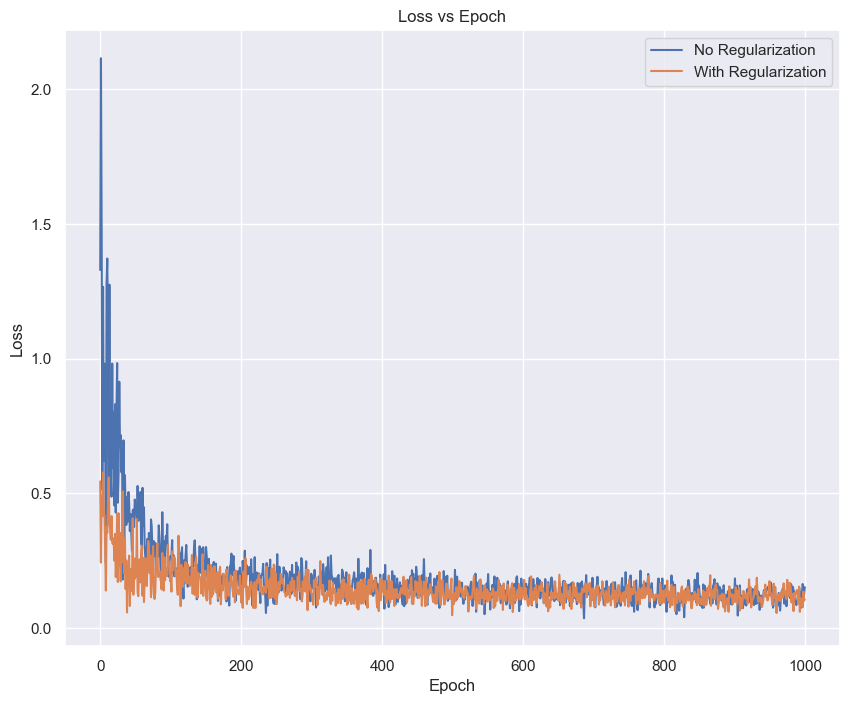

In [832]:
# Plot the cost history (Loss vs Epoch)
plt.figure(figsize=[10, 8])
plt.plot(cost_history_no_reg.detach().numpy(), label="No Regularization")
plt.plot(cost_history_reg.detach().numpy(), label="With Regularization")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()

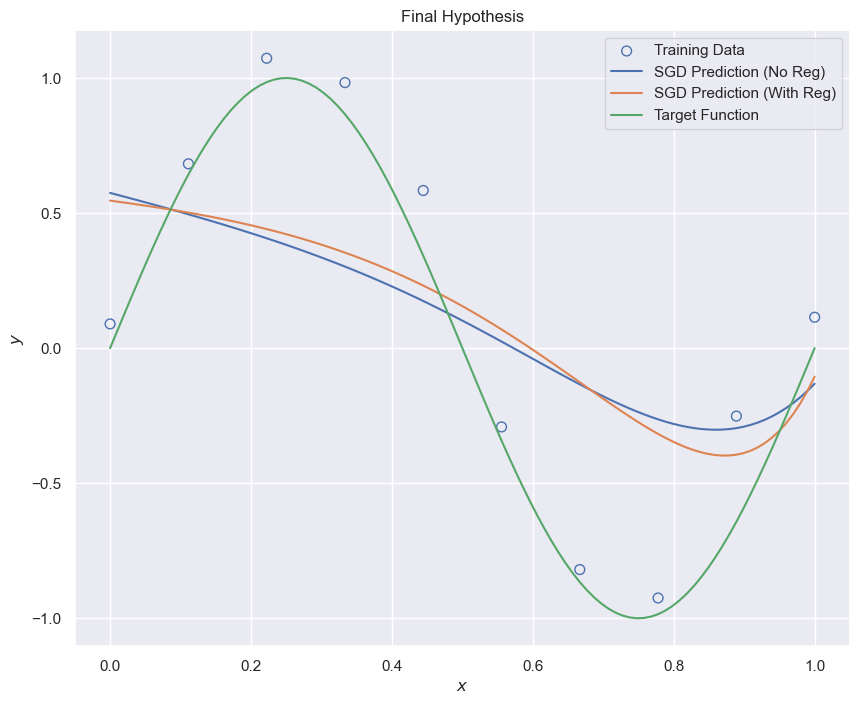

In [833]:
# Plot the final hypothesis
plt.figure(figsize=[10, 8])
plt.scatter(x_train.numpy(), y_train.numpy(), facecolor="none", edgecolor="b", s=50, label="Training Data")
plt.plot(x_test.numpy(), y_pred_no_reg.detach().numpy(), label="SGD Prediction (No Reg)")
plt.plot(x_test.numpy(), y_pred_reg.detach().numpy(), label="SGD Prediction (With Reg)")
plt.plot(x_test.numpy(), y_test.numpy(), "-g", label="Target Function")  # Add the target function for comparison
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Final Hypothesis")
plt.show()


### **Loss Function**
The Mean Squared Error (MSE) loss function with L2 regularization is defined as:

$$
\text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_{\text{pred}, i} - y_{\text{true}, i})^2 + \lambda \sum_{j=1}^{M} \theta_j^2
$$

where:
- *$(N$) is the number of samples.*
- *$(y_{\text{pred}, i}$) is the predicted output for sample $(i$).*
- *$(y_{\text{true}, i}$) is the true output for sample $(i$).*
- *$(\lambda$) is the L2 regularization strength (or penalty).*
- *$(\theta_j$) are the model parameters (weights).*


---

### **Gradient Descent Update Rule**
The update rule for gradient descent is:

$$
\theta_j \leftarrow \theta_j - \alpha \frac{\partial \text{Loss}}{\partial \theta_j}
$$

where:
- *$(\theta_j$) is the parameter being updated.*
- *$(\alpha$) is the learning rate.*
- *$(\frac{\partial \text{Loss}}{\partial \theta_j}$) is the gradient of the loss with respect to the parameter.*


# Task 2 :-  Momentum

### **Hyperparameters**

- Learning rate: = 0.01 
- Iterations:  = 1000 
- Regularization strength(alpha): = 1e-3 
- Momentum: = 0.9 


In [837]:
# HyperParameters 
learning_rate = 0.01
iterations = 1000
alpha = 1e-3
momentum = 0.9

In [838]:
# Implement SGD with Momentum function
#sgd_momentum implements Stochastic Gradient Descent with Momentum and L2 regularization.
#The function iterates over a specified number of iterations, updating the parameters theta using a random subset of the training data.
#The velocity is updated by taking a weighted sum of the previous velocity and the current gradient, which helps the optimizer to navigate more smoothly through the loss landscape.
#The cost is computed for each example and accumulated over the iteration, then averaged and stored in cost_history.
#The final optimized parameters and the cost history are returned.
def sgd_momentum(X, y, theta, learning_rate=0.01, iterations=1000, alpha=1e-3, momentum=0.9):
    m = y.size(0)
    cost_history = torch.zeros(iterations)
    velocity = torch.zeros_like(theta)
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = torch.randint(0, m, (1,)).item()  # random index
            x_i = X[rand_ind, :].view(1, -1)  # x_i is a 2D tensor (1, n_features)
            y_i = y[rand_ind].view(1)  # y_i is a 1D tensor (1,)
            prediction = x_i.matmul(theta)  # prediction is a scalar tensor
            
            # Compute the gradient
            gradient = x_i.t().matmul(prediction - y_i) + alpha * theta  # Gradient with regularization
            
            # Update velocity
            velocity = momentum * velocity + (learning_rate / m) * gradient
            
            # Update theta
            with torch.no_grad():
                theta -= velocity
            
            # Accumulate cost
            cost += cal_cost(theta, x_i, y_i, alpha)
        
        cost_history[it] = cost / m  # Average cost over the batch
    
    return theta, cost_history

In [839]:
# Initialize the parameters (theta)
theta_sgd = torch.randn((X_train.size(1), 1), dtype=torch.float32)  # Random initialization
theta_momentum = torch.randn((X_train.size(1), 1), dtype=torch.float32, requires_grad=True)  # Random initialization


In [840]:
#This line trains a model using Stochastic Gradient Descent without momentum.
theta_sgd, cost_history_sgd = sgd(X_train, y_train, theta_sgd, learning_rate=learning_rate, iterations=iterations,alpha=alpha)
#This line trains a model using Stochastic Gradient Descent with momentum
theta_momentum, cost_history_momentum = sgd_momentum(X_train, y_train, theta_momentum, learning_rate=learning_rate, iterations=iterations, alpha=alpha, momentum=momentum)


In [841]:
# Predict using the trained parameters
y_pred_sgd = X_test.matmul(theta_sgd)
y_pred_momentum = X_test.matmul(theta_momentum)

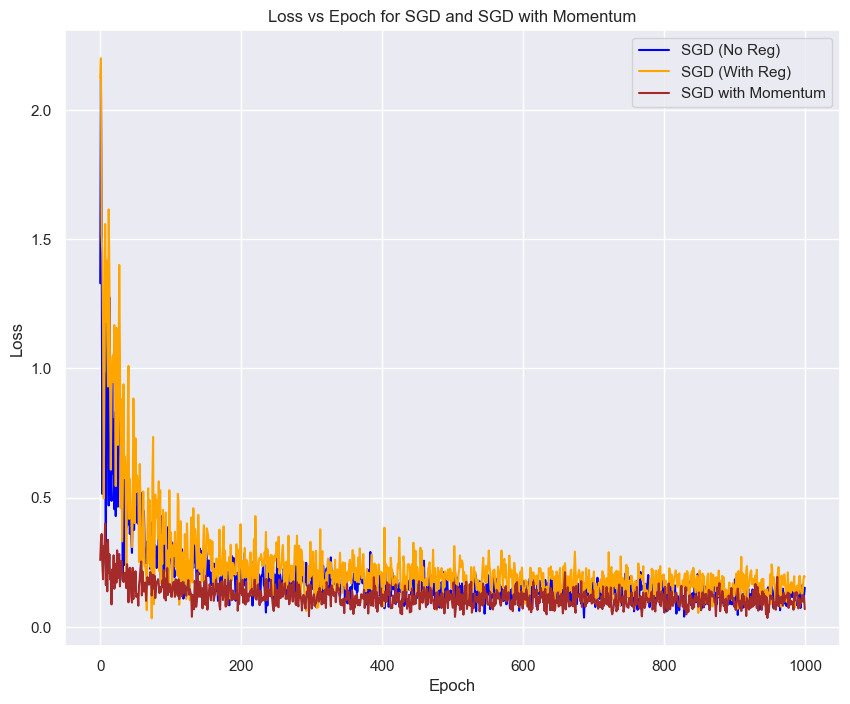

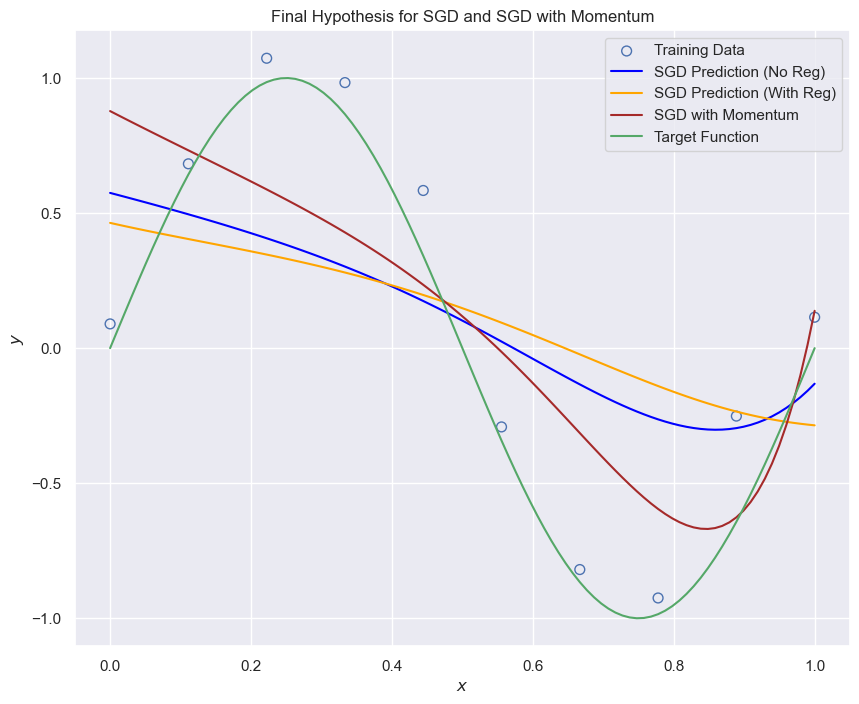

In [842]:
# Loss vs Epoch Plot for all cases
plt.figure(figsize=[10, 8])
plt.plot(cost_history_no_reg.detach(), label="SGD (No Reg)", color='blue')
plt.plot(cost_history_sgd.detach(), label="SGD (With Reg)",color='orange')
plt.plot(cost_history_momentum.detach(), label="SGD with Momentum",color='brown')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch for SGD and SGD with Momentum")
plt.legend()
plt.show()

# Final Hypothesis Plot
plt.figure(figsize=[10, 8])
plt.scatter(x_train.numpy(), y_train.numpy(), facecolor="none", edgecolor="b", s=50, label="Training Data")
plt.plot(x_test.numpy(), y_pred_no_reg.detach().numpy(), label="SGD Prediction (No Reg)",color='blue')
plt.plot(x_test.numpy(), y_pred_sgd.detach().numpy(), label="SGD Prediction (With Reg)",color='orange')
plt.plot(x_test.numpy(), y_pred_momentum.detach().numpy(), label="SGD with Momentum",color='brown')
plt.plot(x_test.numpy(), y_test.numpy(), "-g", label="Target Function")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Final Hypothesis for SGD and SGD with Momentum")
plt.legend()
plt.show()


# Gradient Update for SGD with Momentum
$$
v := \mu v + \eta \nabla_{\theta} J(\theta) 
$$

$$
\theta := \theta - v
$$

### Explanation of Variables and Notations

- v: The velocity term, which accumulates the gradient updates over time.
- mu: The momentum term, controlling the contribution of the previous velocity to the current update. Typically 0 ≤ mu < 1.
- eta: The learning rate, controlling the size of the step taken in the direction of the gradient.
- ∇θ J(θ): The gradient of the cost function J(θ) with respect to the parameters θ.
- θ: The parameters being optimized.
